In [69]:
import numpy as np
from numpy.fft import fft, ifft, fftshift
import matplotlib.pyplot as plt

In [70]:
def fftgrid(a,b,N):
    """ Compute grid for Fourier pseudospectral method on an interval.

    Example:

    x, k = fftgrid(a, b, N).

    Generate grid of N points in the interval [a,b] with periodic BCs. The point b is not included,
    i.e., it is identified with a. Returns x = grid points as array, and f = frequencies as array. If
    psi is a (periodic) function evaluated at the grid points, its
    derivative at the grid points is given to N'th order by

       dpsi = ifft(1j*k*fft(psi)).

    """

    x = np.linspace(a,b,N+1)
    x = x[:-1]
    h = (b-a)/N

    k_c = np.pi/h
    k = np.linspace(-k_c, k_c, N+1)
    k = np.fft.ifftshift(k[:-1])
    return x,k

In [71]:
def htf(f):
    return np.concatenate([[0],-f, [0], f])
def fth(f):
    return f[N//2+1:]

In [72]:
hdiff = lambda psi: fth(ifft(-k**2 * fft(htf(psi))))

In [109]:
U = lambda psi, dt: fth(ifft(np.exp(1j*dt*k**2/2) * fft(htf(psi))))

In [110]:
N = 2048*2
x0,k = fftgrid(-1,1,N)
x = x0[N//2+1:]

In [161]:
dt = 0.01
#psi = x
#psi = 0.5 - np.abs(x - 0.5)
psi = 0*x + 1

In [155]:
from functools import reduce 
fib = lambda n:reduce(lambda x,n:[x[1],x[0]+x[1]], range(n),[0,1])[0]

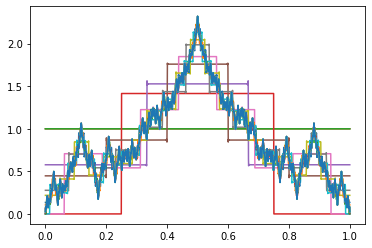

In [168]:
plt.figure()
plt.plot(x,psi)
for n in range(20):
    t = fib(n)/fib(n+1)
    plt.plot(x,np.abs(U(psi,t/(2*np.pi))))

In [151]:
fib(14)/fib(15)

0.6180327868852459